<a href="https://colab.research.google.com/github/jjuandiego099/cuadernos-y-proyectos-IA/blob/main/vistaminable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")




100%|██████████| 8.91k/8.91k [00:00<00:00, 11.2MB/s]

Extracting files...


In [8]:
df = pd.read_csv(path+"/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
df.shape

(768, 9)

Separar los feautres y la etiqueta

In [14]:
# prompt: separar X y y

X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [22]:
#Normalizar los features del df X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
x = pd.DataFrame(X, columns=df.columns[:-1])
x


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [70]:
#Usar variancetreehold para eliminar las features que tengan las varianzas mas bajas  menor a 0.1 en x

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=1)
X_clean=selector.fit(x).transform(x)
X_clean=pd.DataFrame(X_clean, columns=x.columns[selector.get_support()])
X_clean



,Pregnancies,Insulin,DiabetesPedigreeFunction
0,0.639947,-0.692891,0.468492
1,-0.844885,-0.692891,-0.365061
2,1.233880,-0.692891,0.604397
3,-0.844885,0.123302,-0.920763
4,-1.141852,0.765836,5.484909
...,...,...,...
763,1.827813,0.870031,-0.908682
764,-0.547919,-0.692891,-0.398282
765,0.342981,0.279594,-0.685193
766,-0.844885,-0.692891,-0.371101


In [61]:
selector.get_feature_names_out()

array(['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction'], dtype=object)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42, stratify=y)

In [66]:
X_clean.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((768, 3), (614, 3), (154, 3), (614,), (154,))

<Axes: xlabel='Outcome', ylabel='count'>

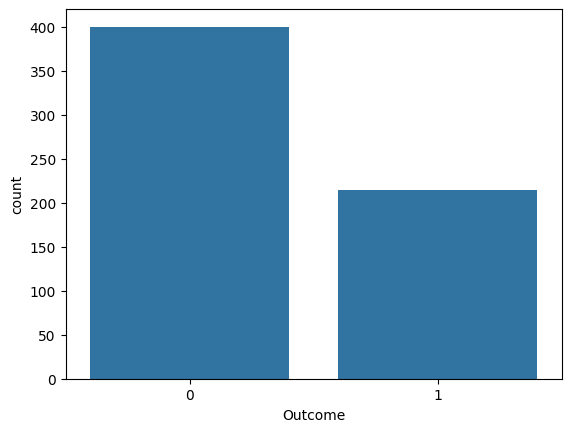

In [74]:
sns.countplot(x=y_train)

<Axes: xlabel='Outcome', ylabel='count'>

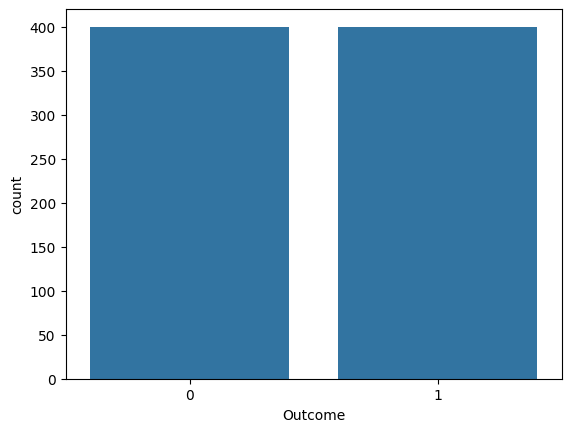

In [80]:
# prompt: #voy a balancear los datos del df usando la columna Outcome, vamos a usar SMOTE con oversampling

from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balancear los datos
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Verificar el balanceo de clases después de aplicar SMOTE
sns.countplot(x=y_train)


<Axes: xlabel='Outcome', ylabel='count'>

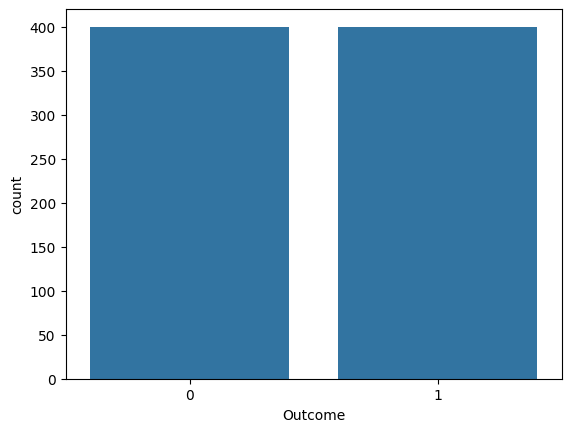

In [81]:
sns.countplot(x=y_train)